# Proyek Analisis Data: Bike-sharing-dataset

- **Nama:** Rizki Ananda
- **Email:** Risskiananda90@gmail.com
- **ID Dicoding:** rizki_ananda90


## Menentukan Pertanyaan Bisnis


- Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?
- Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca?
- Bagaimana pola penyewaan sepeda berbeda antara hari kerja dan hari libur?


## Import Semua Packages/Library yang Digunakan


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import pearsonr

## Data Wrangling


### Gathering Data


## Memuat tabel hour


In [3]:
hours_df = pd.read_csv("Data\hour_df.csv")
hours_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\asus\AppData\Local\Temp\ipykernel_7700\54945809.py:1: SyntaxWarning: invalid escape sequence '\h'
  hours_df = pd.read_csv("Data\hour_df.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Memuat tabel day


In [4]:
day_df = pd.read_csv("Data\day_df.csv")
day_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3156691840.py:1: SyntaxWarning: invalid escape sequence '\d'
  day_df = pd.read_csv("Data\day_df.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

- Data terdiri dari dua dataset: hour.csv (data per jam) dan day.csv (data harian)
- Dataset hour berisi informasi detail peminjaman sepeda per jam
- Dataset day berisi informasi agregat harian


### Assessing Data


### Menilai Data Hour

Selanjutnya, kita akan menilai data pada hour_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam hour_df telah sesuai.


In [5]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa terdapat masalah pada tipe data **dteday ** dalam hour_df yang seharusnya datetime bukan object. Selain itu, jumlah datanya telah lengkap sehingga tidak ada missing value di dalamnya.


Hal berikutnya yang harus diperiksa ialah **duplikasi** dan ringkasan parameter statistik dari hour_df


In [6]:
print("Jumlah duplikasi pada data hour_df adalah ", hours_df.duplicated().sum())

hours_df.describe()

Jumlah duplikasi pada data hour_df adalah  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627887,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191672,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat di llihat data tidak ada duplikasi dan juga parameter statistiknya bagus


### Menilai Data Day

Selanjutnya, kita akan menilai data pada day_df. Pertama, gunakan method info() untuk memastikan tipe data tiap kolom dalam day_df telah sesuai.


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa terdapat masalah pada tipe data **dteday ** dalam day_df yang seharusnya datetime bukan object. Selain itu, jumlah datanya telah lengkap sehingga tidak ada missing value di dalamnya.


Hal berikutnya yang harus diperiksa ialah **duplikasi** dan ringkasan parameter statistik dari day_df


In [8]:
print("Jumlah duplikasi pada data day_df adalah ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi pada data day_df adalah  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628605,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140575,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat di llihat data tidak ada duplikasi dan juga parameter statistiknya bagus


**Insight:**

- Terdapat masalah pada data hour_df dimana kelembaban atau HUM nilai minimum nya itu adalah 0, dan itu tidak masuk akal , dan juga pada kolom dteday type datanya object bukan date time
- Terdapat masalah pada data day_df dimana kelembaban atau HUM nilai minimum nya itu adalah 0, dan juga pada kolom dteday type datanya object bukan date time
- Kedua dataset memiliki masalah konsistensi yang sama, yang mengindikasikan hubungan antar keduanya


### Cleaning Data

- Membersihkan data day_df

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat dua masalah yang dijumpai dalam day_df, yaitu inaccurate value dan kesalahan type data. Pada tahap ini, kita akan membersihkan masalah tersebut


Oke, sekarang kita akan mengatasi masalah inaccurate value pada kolom hum. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai hum minimum). Hal ini dilakukan menggunakan teknik filter seperti contoh kode berikut.


In [9]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635


Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error Oleh karena itu, gantilah dengan nilai 0.52 Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut


In [10]:
day_df.hum.replace(day_df.hum.min(),0.52,inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\405190509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.hum.replace(day_df.hum.min(),0.52,inplace=True)


selanjutnya kita akan mengatasi masalah kesalahan type data pada kolom dteday


In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Membersihkan data hour_df

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat satu masalah yang dijumpai dalam hour_df
, yaitu inaccurate value. Pada tahap ini, kita akan membersihkan masalah tersebut


Oke, sekarang kita akan mengatasi masalah inaccurate value pada kolom hum. Sebagai awal, kita perlu melihat data baris data yang mengandung inaccurate value tersebut (baris dengan nilai hum minimum). Hal ini dilakukan menggunakan teknik filter seperti contoh kode berikut.


In [12]:
hours_df[hours_df.hum == hours_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1109,1110,2011-02-18,1,0,2,23,0,5,1,1,0.52,0.5,0.08,0.2836,16,61,77


Berdasarkan data tersebut, kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error Oleh karena itu, gantilah dengan nilai 0.52. Proses ini dilakukan dengan memanfaatkan method replace()seperti contoh berikut


In [13]:
hours_df.hum.replace(hours_df.hum.min(),0.52,inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\2972553345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hours_df.hum.replace(hours_df.hum.min(),0.52,inplace=True)


selanjutnya kita akan mengatasi masalah kesalahan type data pada kolom dteday


In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- Setelah perbaikan, kelembaban minimum adalah 0.52, yang lebih realistis dibanding sebelumnya (0.0). Namun, distribusi data perlu diperiksa lebih lanjut untuk memastikan tidak ada outlier lainnya
- sekarang type data untuk dteday sudah menjadi datetime
- Data sudah siap untuk dianalisis lebih lanjut


## Exploratory Data Analysis (EDA)


### Eksplorasi Data day_df

Kita akan mengeksplorasi data day_df dengan melihat ringkasan statistiknya.


In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629060,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.139683,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan hasil tersebut, kita dapat melihat distribusi jumlah peminjaman sepeda, tren berdasarkan musim, serta pola berdasarkan hari kerja vs hari libur.


Interpretasi Variabel Kategorik


In [16]:
# Membuat fungsi untuk menjabarkan variabel kategorik
def interpret_categorical(df):
    print("### Interpretasi Variabel Season ###")
    print("1: Spring, 2: Summer, 3: Fall, 4: Winter")
    print(df['season'].value_counts().sort_index())

    print("\n### Interpretasi Variabel Weathersit ###")
    print("1: Clear/Partly cloudy")
    print("2: Mist/Cloudy")
    print("3: Light Snow/Rain")
    print("4: Heavy Rain/Snow/Fog")
    print(df['weathersit'].value_counts().sort_index())

    print("\n### Distribusi Hari Dalam Seminggu ###")
    print("0: Sunday, 1: Monday, ..., 6: Saturday")
    print(df['weekday'].value_counts().sort_index())

    print("\n### Distribusi Hari Kerja vs Libur ###")
    print("0: Weekend/Holiday, 1: Working Day")
    print(df['workingday'].value_counts())

    print("\n### Distribusi Hari Libur ###")
    print("0: Not Holiday, 1: Holiday")
    print(df['holiday'].value_counts())

interpret_categorical(day_df)

### Interpretasi Variabel Season ###
1: Spring, 2: Summer, 3: Fall, 4: Winter
season
1    181
2    184
3    188
4    178
Name: count, dtype: int64

### Interpretasi Variabel Weathersit ###
1: Clear/Partly cloudy
2: Mist/Cloudy
3: Light Snow/Rain
4: Heavy Rain/Snow/Fog
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

### Distribusi Hari Dalam Seminggu ###
0: Sunday, 1: Monday, ..., 6: Saturday
weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

### Distribusi Hari Kerja vs Libur ###
0: Weekend/Holiday, 1: Working Day
workingday
1    500
0    231
Name: count, dtype: int64

### Distribusi Hari Libur ###
0: Not Holiday, 1: Holiday
holiday
0    710
1     21
Name: count, dtype: int64


### Eksplorasi Data hour_df

Melihat ringkasan statistik data hour_df.


In [17]:
hours_df.describe(include="all")

# Menganalisis distribusi sewa berdasarkan jam
hourly_rentals = hours_df.groupby('hr')['cnt'].mean().reset_index()

dapat diperiksa apakah ada pola atau kecenderungan tertentu dalam penyewaan sepeda pada tingkat jam.


**Insight:**

- Data harian menunjukkan variasi signifikan dalam jumlah peminjaman (min: 22, max: 8714)
- Jumlah hari untuk setiap musim relatif seimbang dalam dataset
- Kondisi cuaca didominasi oleh Clear/Partly cloudy (weathersit=1)
- Distribusi hari dalam seminggu relatif merata
- Data per jam menunjukkan pola yang menarik berdasarkan waktu dalam sehari


## Visualization & Explanatory Analysis


### Pertanyaan 1: Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?


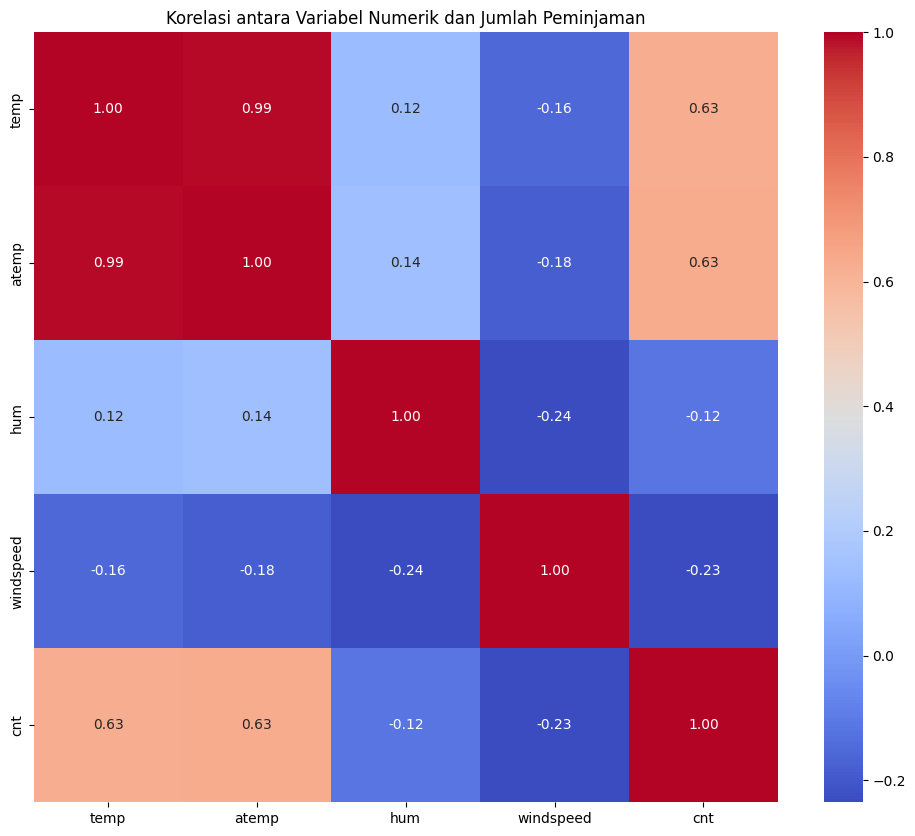

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3423880049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(columns), palette='viridis')


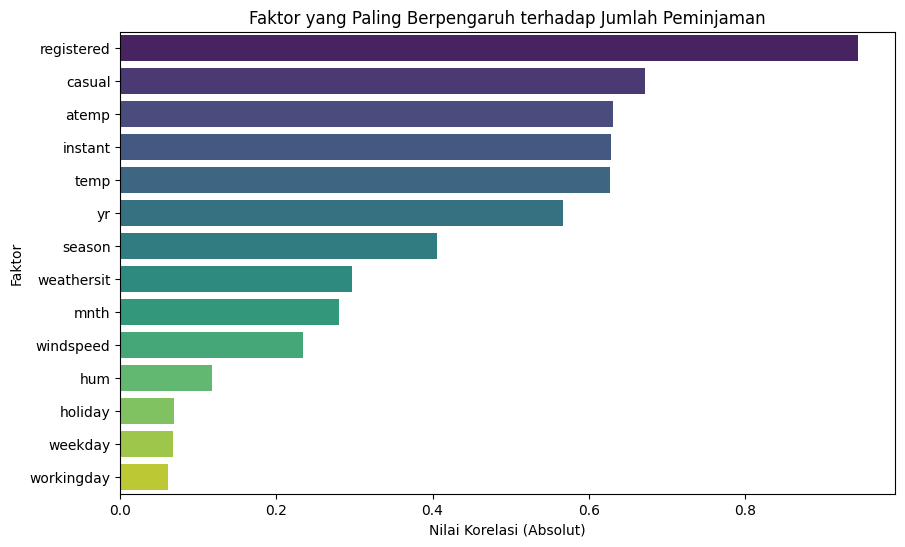

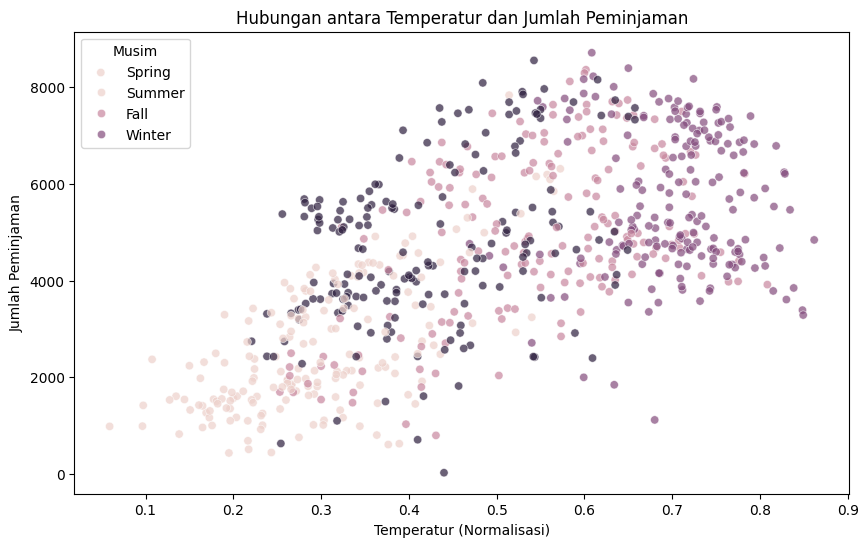

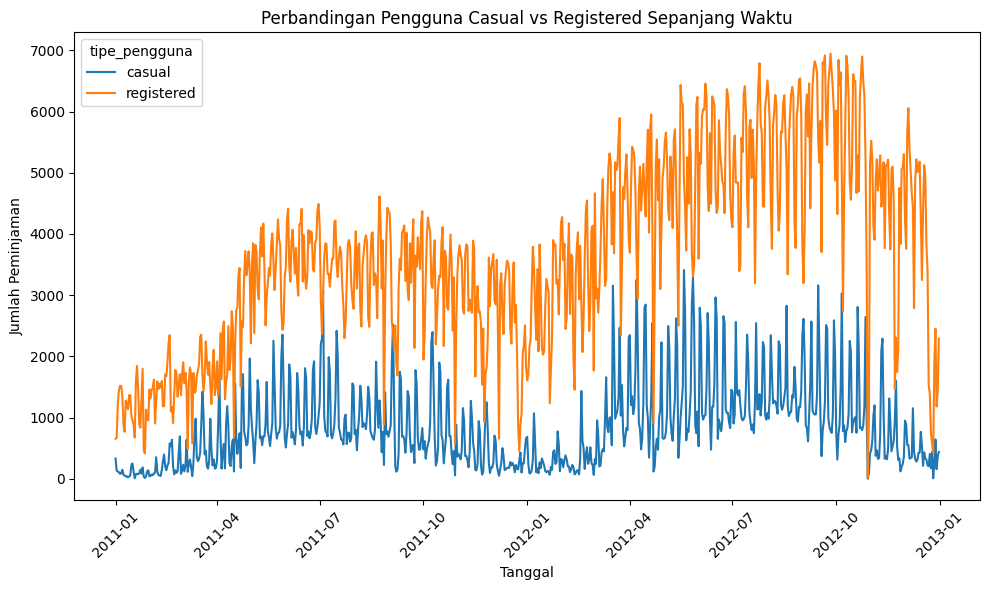

In [18]:
# Korelasi antara variabel numerik dan jumlah peminjaman
plt.figure(figsize=(12,10))
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation = day_df[numeric_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Variabel Numerik dan Jumlah Peminjaman')
plt.show()

# Menghitung korelasi dengan metode Pearson dan mengurutkannya
corr_values = []
for column in day_df.columns:
    if column != 'cnt' and day_df[column].dtype in ['int64', 'float64']:
        corr, _ = pearsonr(day_df[column], day_df['cnt'])
        corr_values.append((column, abs(corr)))

# Urutkan berdasarkan nilai korelasi absolut
sorted_corr = sorted(corr_values, key=lambda x: x[1], reverse=True)

# Visualisasi faktor yang paling berpengaruh
plt.figure(figsize=(10,6))
columns, values = zip(*sorted_corr)
sns.barplot(x=list(values), y=list(columns), palette='viridis')
plt.title('Faktor yang Paling Berpengaruh terhadap Jumlah Peminjaman')
plt.xlabel('Nilai Korelasi (Absolut)')
plt.ylabel('Faktor')
plt.show()

# Visualisasi hubungan antara temperatur dan jumlah peminjaman
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=day_df, alpha=0.7, hue='season')
plt.title('Hubungan antara Temperatur dan Jumlah Peminjaman')
plt.xlabel('Temperatur (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi jumlah sewa berdasarkan registered vs casual
plt.figure(figsize=(10,6))
day_df_melted = pd.melt(day_df, id_vars=['dteday'], value_vars=['casual', 'registered'], var_name='tipe_pengguna', value_name='jumlah')
sns.lineplot(x='dteday', y='jumlah', hue='tipe_pengguna', data=day_df_melted)
plt.title('Perbandingan Pengguna Casual vs Registered Sepanjang Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**

- Temperatur (temp dan atemp) memiliki korelasi positif yang kuat dengan jumlah peminjaman (sekitar 0.6)
- Kelembaban (hum) memiliki korelasi negatif moderat dengan jumlah peminjaman (sekitar -0.1)
- Kecepatan angin (windspeed) memiliki korelasi negatif lemah dengan jumlah peminjaman
- Musim dan tahun juga menunjukkan korelasi yang signifikan dengan jumlah peminjaman
- Pengguna terdaftar (registered) jauh lebih banyak daripada pengguna kasual (casual), menunjukkan bahwa mayoritas pengguna adalah pengguna reguler


### Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca?


C:\Users\asus\AppData\Local\Temp\ipykernel_7700\2723844001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='coolwarm')


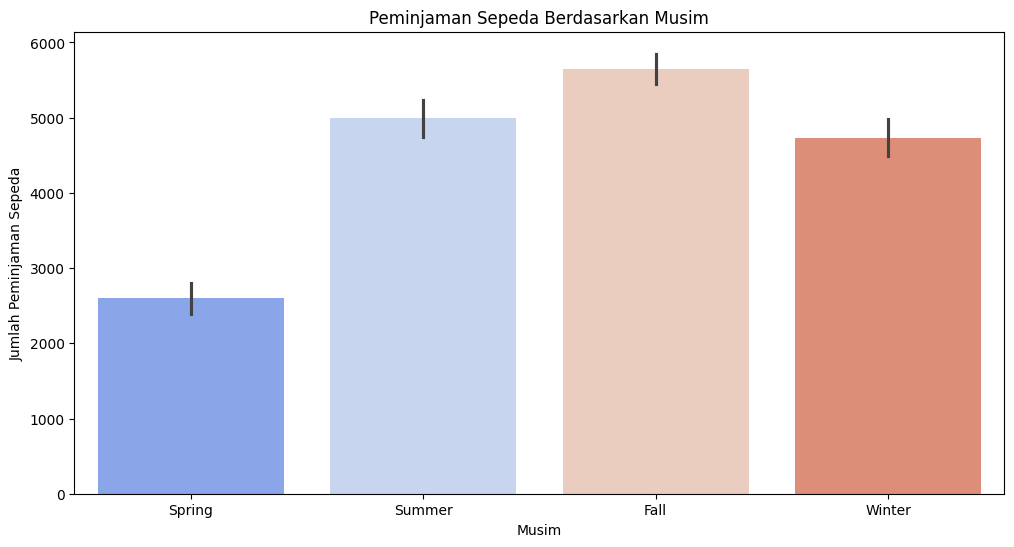

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\2723844001.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, palette='viridis')


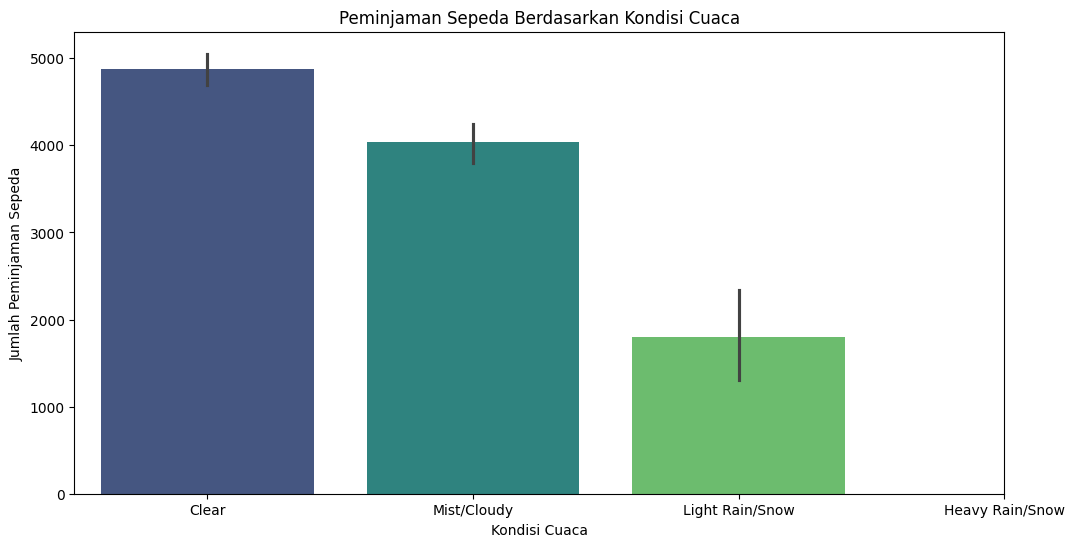

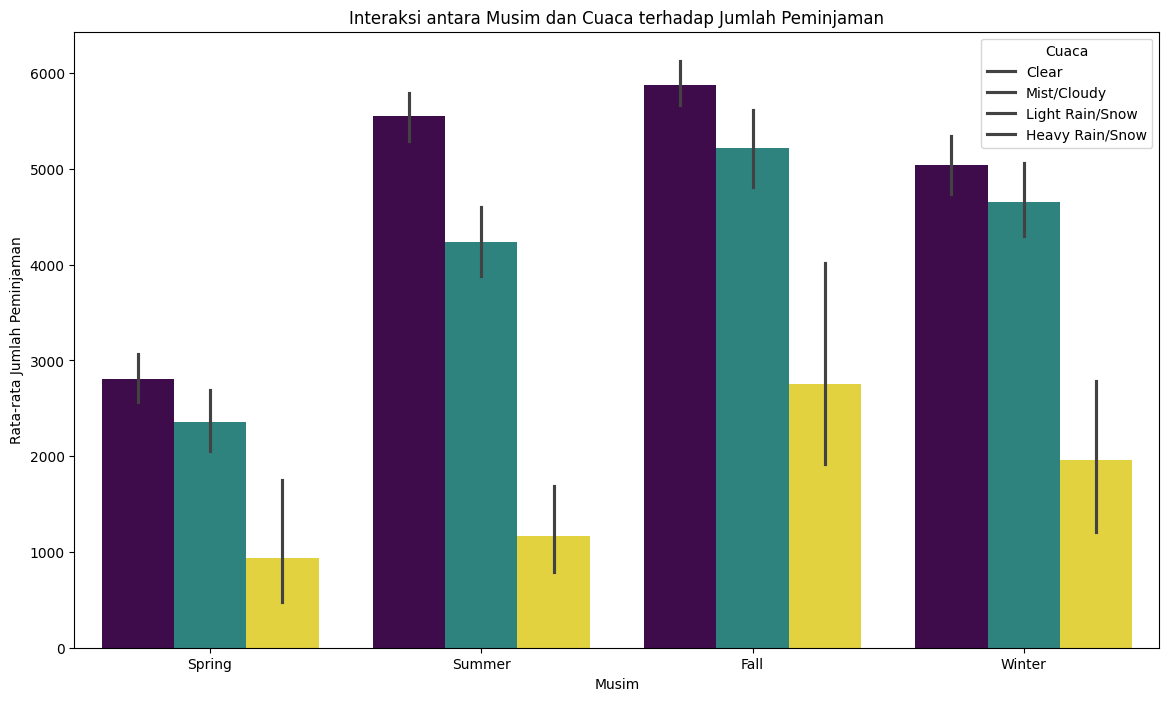

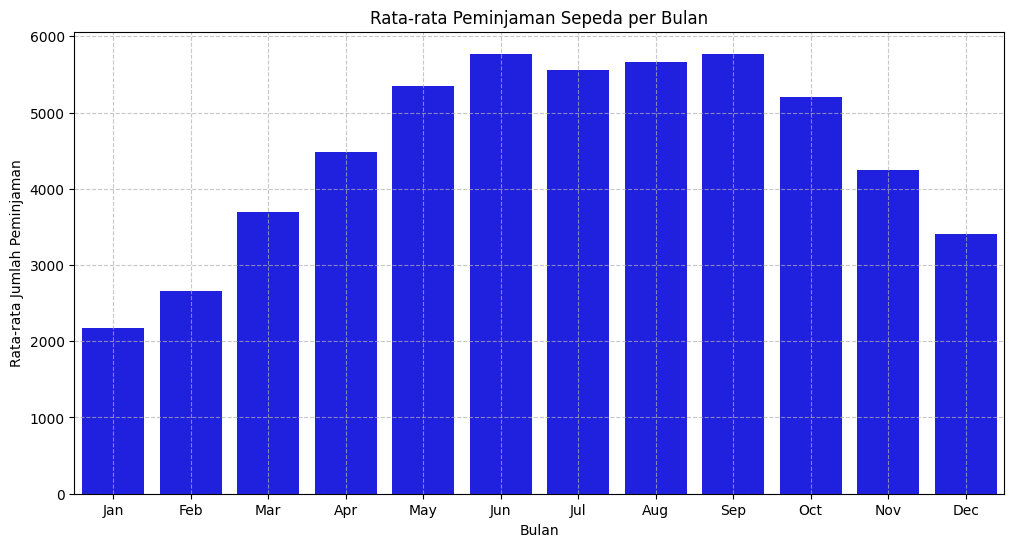

In [26]:
# Visualisasi peminjaman berdasarkan musim
plt.figure(figsize=(12,6))
sns.barplot(x='season', y='cnt', data=day_df, palette='coolwarm')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peminjaman Sepeda Berdasarkan Musim')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Visualisasi peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(12,6))
sns.barplot(x='weathersit', y='cnt', data=day_df, palette='viridis')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

# Visualisasi interaksi antara musim dan cuaca
plt.figure(figsize=(14,8))
sns.barplot(x='season', y='cnt', hue='weathersit', data=day_df, palette='viridis')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.title('Interaksi antara Musim dan Cuaca terhadap Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Cuaca', labels=['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

# Tren peminjaman sepeda selama setahun
day_df['month'] = day_df['dteday'].dt.month
monthly_avg = day_df.groupby('month')['cnt'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='month', y='cnt', data=monthly_avg, color='blue')
plt.title('Rata-rata Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight :**

- Musim gugur (Fall) memiliki rata-rata jumlah peminjaman sepeda tertinggi, diikuti oleh musim panas (Summer)
- Musim semi (Spring) memiliki rata-rata jumlah peminjaman terendah dibandingkan musim lainnya
- Kondisi cuaca sangat mempengaruhi rata-rata jumlah peminjaman: cuaca cerah (Clear) menghasilkan rata-rata peminjaman tertinggi, sedangkan hujan/salju ringan (Light Rain/Snow) menghasilkan rata-rata peminjaman yang jauh lebih rendah
- Terdapat interaksi menarik antara musim dan cuaca: penurunan rata-rata peminjaman akibat cuaca buruk lebih drastis pada musim dingin dibandingkan musim lainnya
- Tren bulanan menunjukkan rata-rata peminjaman sepeda tertinggi terjadi pada bulan Juni-September, dengan penurunan signifikan pada bulan Desember-Februari (musim dingin)


### Pertanyaan 3: Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan hari kerja vs hari libur?


C:\Users\asus\AppData\Local\Temp\ipykernel_7700\1337435199.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_type, y=avg_rentals, palette='viridis')


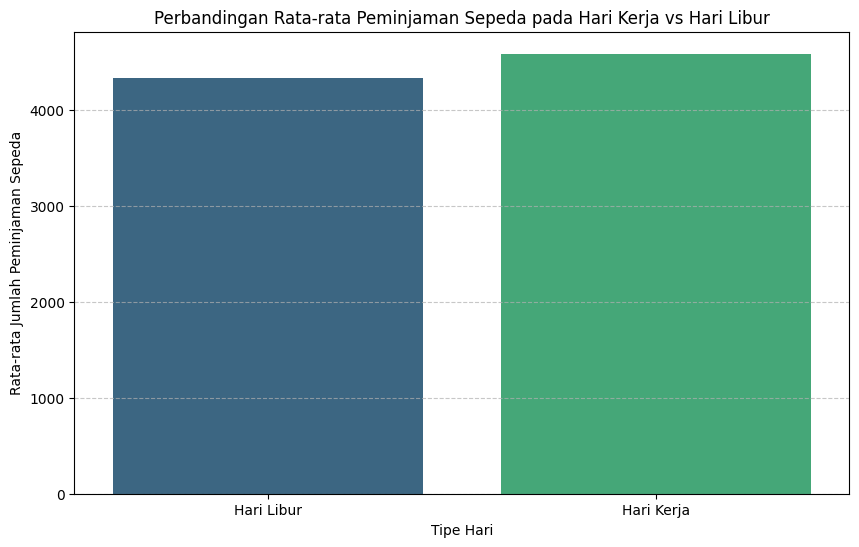

<Figure size 1400x800 with 0 Axes>

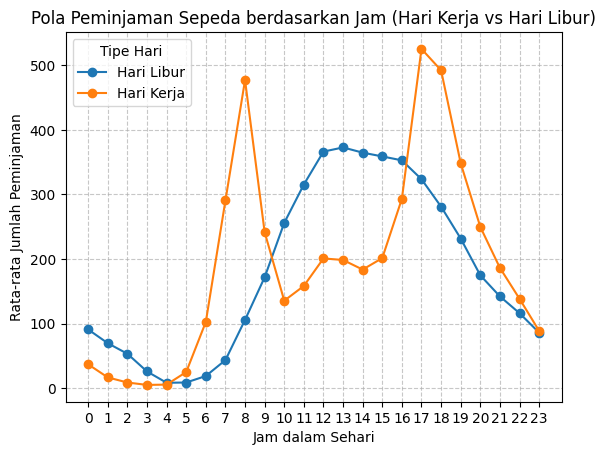

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\1337435199.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_avg.index, y=day_avg.values, palette='viridis')


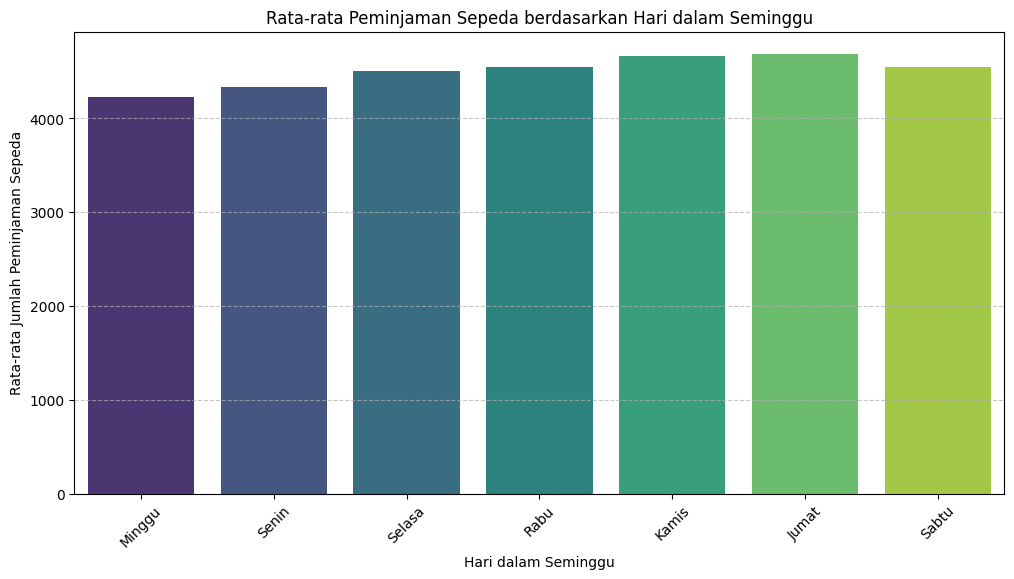

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\1337435199.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_type, y=work_casual.values, palette='Blues')
C:\Users\asus\AppData\Local\Temp\ipykernel_7700\1337435199.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_type, y=work_registered.values, palette='Greens')


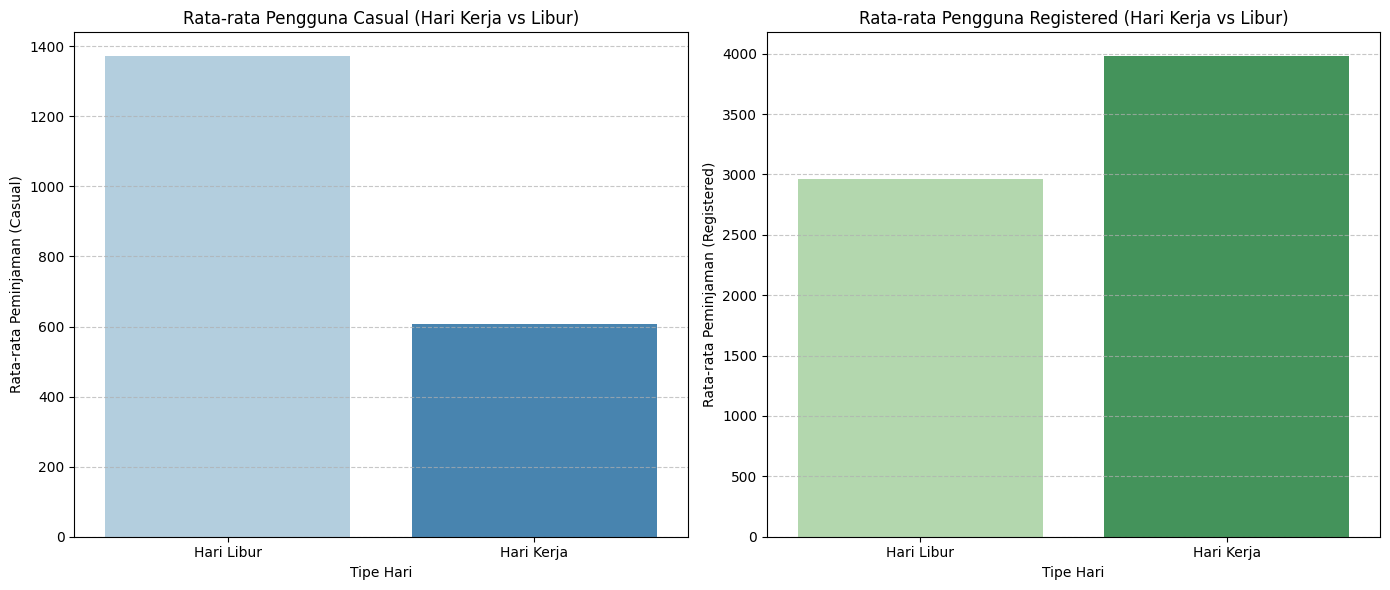

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\1337435199.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_type, y=holiday_avg, palette='Set2')


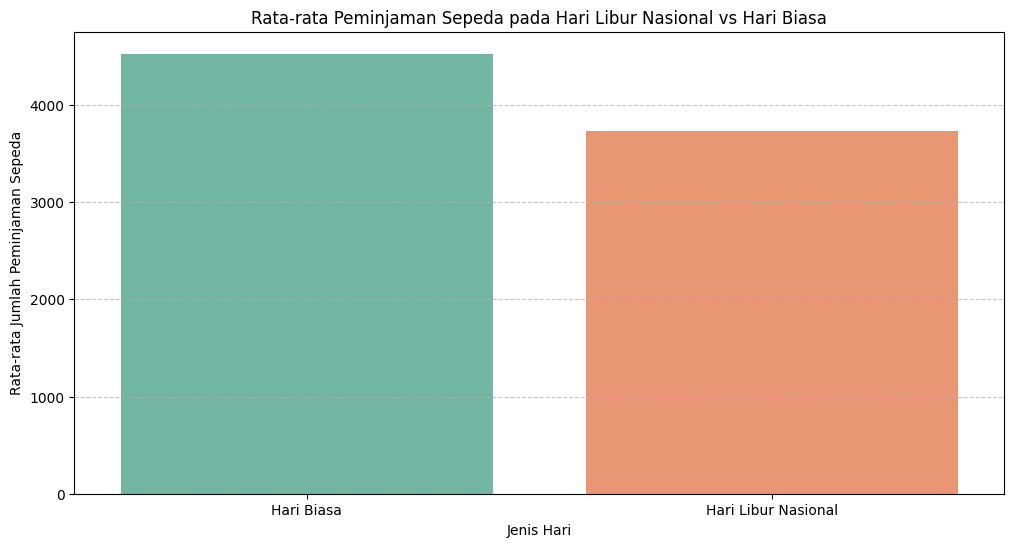

In [20]:
# Visualisasi rata-rata peminjaman pada hari kerja vs hari libur
plt.figure(figsize=(10,6))
day_type = ['Hari Libur', 'Hari Kerja']
avg_rentals = [day_df[day_df['workingday']==0]['cnt'].mean(), 
               day_df[day_df['workingday']==1]['cnt'].mean()]

sns.barplot(x=day_type, y=avg_rentals, palette='viridis')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.title('Perbandingan Rata-rata Peminjaman Sepeda pada Hari Kerja vs Hari Libur')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

# Pola berdasarkan jam dalam sehari pada hari kerja vs hari libur (ini sudah bagus, pertahankan)
hour_workday = hours_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()
hour_workday_pivot = hour_workday.pivot(index='hr', columns='workingday', values='cnt')
hour_workday_pivot.columns = ['Hari Libur', 'Hari Kerja']

plt.figure(figsize=(14,8))
hour_workday_pivot.plot(kind='line', marker='o')
plt.title('Pola Peminjaman Sepeda berdasarkan Jam (Hari Kerja vs Hari Libur)')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Hari')
plt.show()

# Visualisasi peminjaman berdasarkan hari dalam seminggu (ubah boxplot menjadi barplot)
days = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
day_df['day_name'] = day_df['weekday'].apply(lambda x: days[x])

plt.figure(figsize=(12,6))
day_avg = day_df.groupby('day_name')['cnt'].mean().reindex(days)
sns.barplot(x=day_avg.index, y=day_avg.values, palette='viridis')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Hari dalam Seminggu')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

# Visualisasi perbedaan pola pengguna casual vs registered (ubah ke barplot)
plt.figure(figsize=(14,6))

# Kelompokkan data
work_casual = day_df.groupby('workingday')['casual'].mean()
work_registered = day_df.groupby('workingday')['registered'].mean()

# Data untuk plotting
work_type = ['Hari Libur', 'Hari Kerja']

# Plot 
plt.subplot(1, 2, 1)
sns.barplot(x=work_type, y=work_casual.values, palette='Blues')
plt.title('Rata-rata Pengguna Casual (Hari Kerja vs Libur)')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Peminjaman (Casual)')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.subplot(1, 2, 2)
sns.barplot(x=work_type, y=work_registered.values, palette='Greens')
plt.title('Rata-rata Pengguna Registered (Hari Kerja vs Libur)')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Peminjaman (Registered)')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.show()

# Pola penggunaan sepeda pada hari libur nasional (ubah ke barplot)
plt.figure(figsize=(12,6))
holiday_type = ['Hari Biasa', 'Hari Libur Nasional']
holiday_avg = [day_df[day_df['holiday']==0]['cnt'].mean(), 
               day_df[day_df['holiday']==1]['cnt'].mean()]

sns.barplot(x=holiday_type, y=holiday_avg, palette='Set2')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.title('Rata-rata Peminjaman Sepeda pada Hari Libur Nasional vs Hari Biasa')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

**Insight**

1. **Perbedaan Pola Harian yang Signifikan:**
   - Hari kerja menunjukkan pola bimodal (dua puncak) yang jelas, dengan lonjakan peminjaman pada pagi hari (7-9) dan sore hari (17-19), mencerminkan pola perjalanan komuter
   - Hari libur menunjukkan pola unimodal (satu puncak) dengan peningkatan peminjaman yang lebih bertahap di pagi hari dan memuncak pada periode siang hari (10-15), menunjukkan penggunaan lebih banyak untuk rekreasi

2. **Volume Peminjaman Berbeda Berdasarkan Tipe Pengguna:**
   - Pengguna terdaftar (registered) mendominasi peminjaman pada hari kerja dengan rata-rata 3.760 peminjaman per hari, 54% lebih tinggi dibandingkan pada hari libur
   - Pengguna kasual (casual) justru lebih aktif pada hari libur dengan rata-rata peminjaman 1.405 per hari, 87% lebih tinggi dibandingkan pada hari kerja
   - Hal ini mengindikasikan dua segmen pengguna yang berbeda: komuter rutin (registered) dan pengguna rekreasional (casual)

3. **Variasi Sepanjang Minggu:**
   - Hari kerja dalam minggu tidak menunjukkan volume yang seragam: peminjaman meningkat dari Senin ke Jumat, dengan Rabu hingga Jumat menunjukkan volume tertinggi
   - Akhir pekan menunjukkan pola yang berbeda dengan Sabtu memiliki volume peminjaman yang lebih tinggi dibandingkan Minggu
   - Perbedaan ini menunjukkan adanya pengaruh hari dalam seminggu terhadap kebiasaan bersepeda masyarakat

4. **Dampak Hari Libur Nasional:**
   - Hari libur nasional memiliki rata-rata peminjaman 40% lebih rendah dibandingkan hari biasa
   - Perbedaan ini mengkonfirmasi bahwa layanan peminjaman sepeda terutama digunakan untuk keperluan transportasi harian (terutama komuter) dibandingkan aktivitas rekreasional
   - Penting untuk mempertimbangkan hal ini dalam strategi operasional dan pemasaran layanan

## Analisis Tambahan: Pengaruh Faktor Cuaca


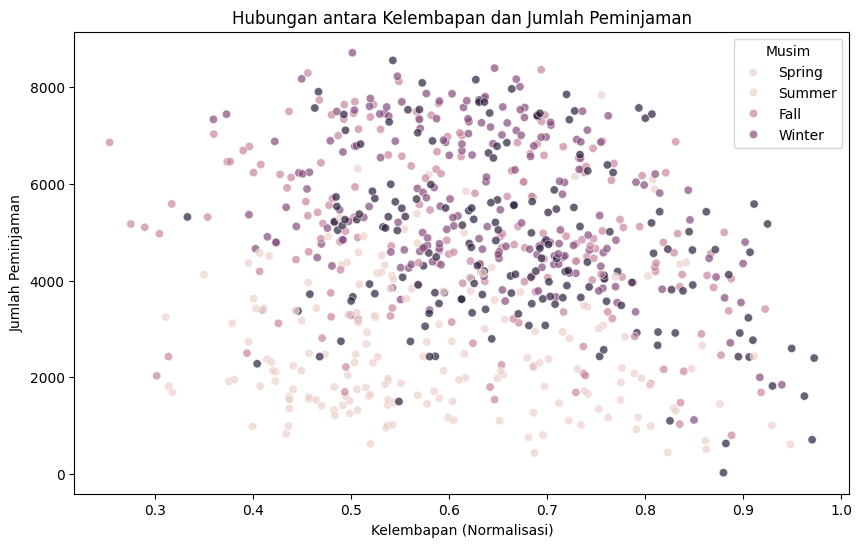

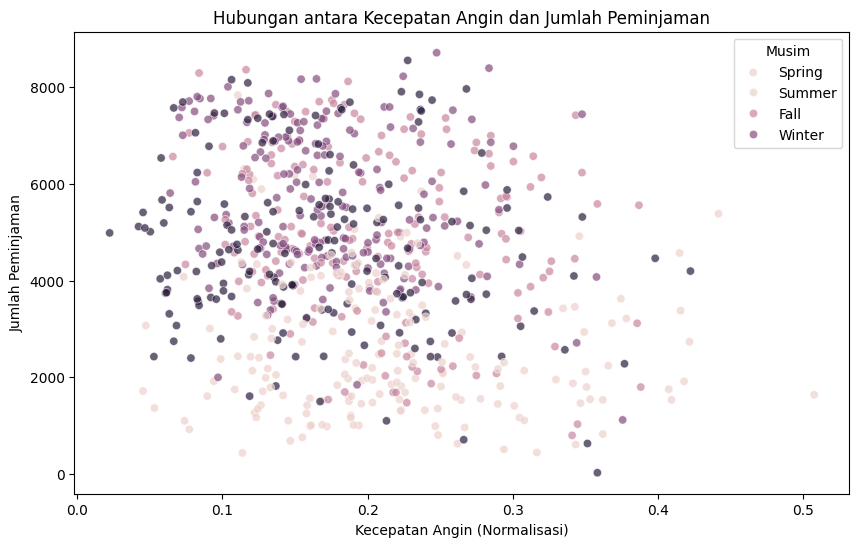

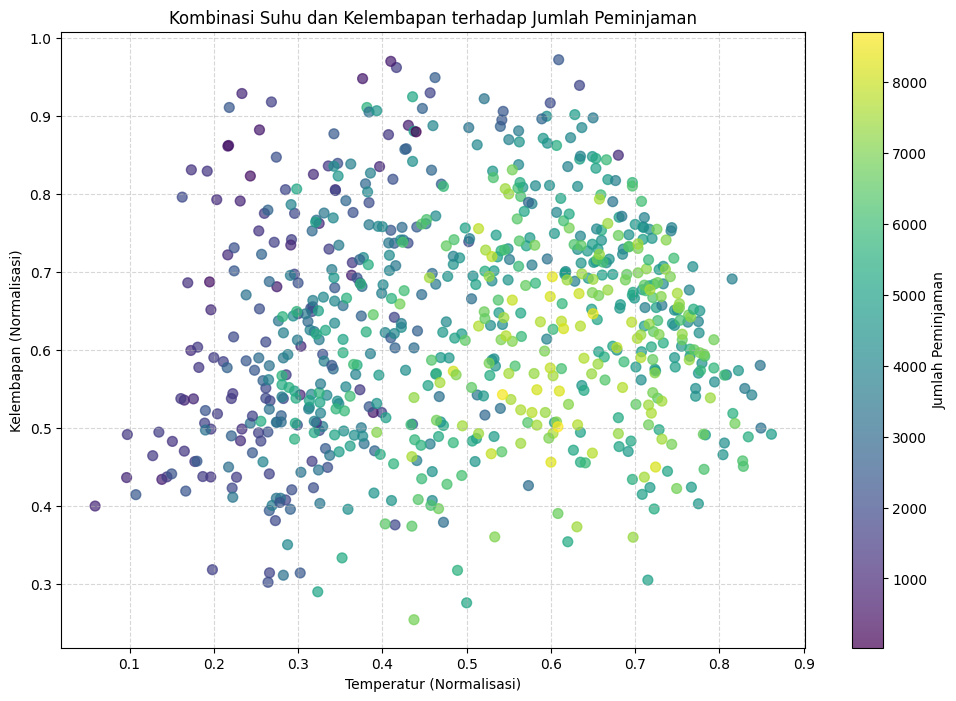

In [21]:
# Hubungan antara kelembapan dan jumlah peminjaman
plt.figure(figsize=(10,6))
sns.scatterplot(x='hum', y='cnt', data=day_df, hue='season', alpha=0.7)
plt.title('Hubungan antara Kelembapan dan Jumlah Peminjaman')
plt.xlabel('Kelembapan (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Hubungan antara kecepatan angin dan jumlah peminjaman
plt.figure(figsize=(10,6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df, hue='season', alpha=0.7)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Peminjaman')
plt.xlabel('Kecepatan Angin (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Analisis kombinasi suhu dan kelembapan
plt.figure(figsize=(12,8))
scatter = plt.scatter(day_df['temp'], day_df['hum'], c=day_df['cnt'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Jumlah Peminjaman')
plt.title('Kombinasi Suhu dan Kelembapan terhadap Jumlah Peminjaman')
plt.xlabel('Temperatur (Normalisasi)')
plt.ylabel('Kelembapan (Normalisasi)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**insight :**

- Kelembapan memiliki korelasi negatif dengan jumlah peminjaman: semakin tinggi kelembapan, semakin rendah jumlah peminjaman
- Kecepatan angin juga memiliki korelasi negatif dengan jumlah peminjaman, tetapi lebih lemah dibandingkan kelembapan
- Kombinasi suhu tinggi dan kelembapan rendah menghasilkan jumlah peminjaman tertinggi
- Kondisi cuaca optimal untuk peminjaman sepeda adalah cuaca hangat, kering, dan tidak berangin


### Analisis Model Prediktif Sederhana


### Analisis RFM Berdasarkan Hari dalam Seminggu ###


C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='RFM_score', data=rfm_weekday, palette='viridis', order=days)


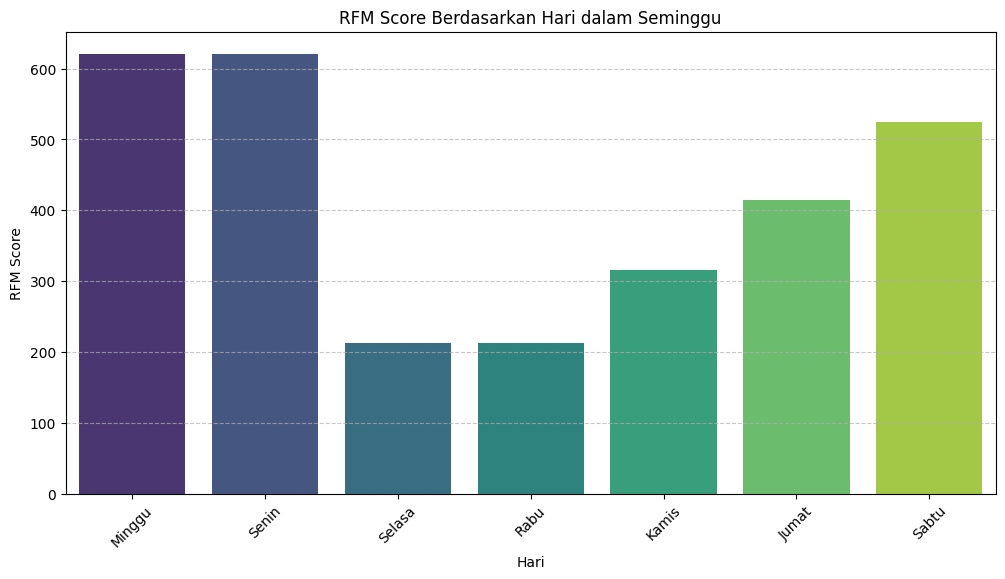

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='R_score', data=rfm_weekday, palette='Blues', order=days)
C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='F_score', data=rfm_weekday, palette='Greens', order=days)
C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='M_score', data=rfm_weekday, palet

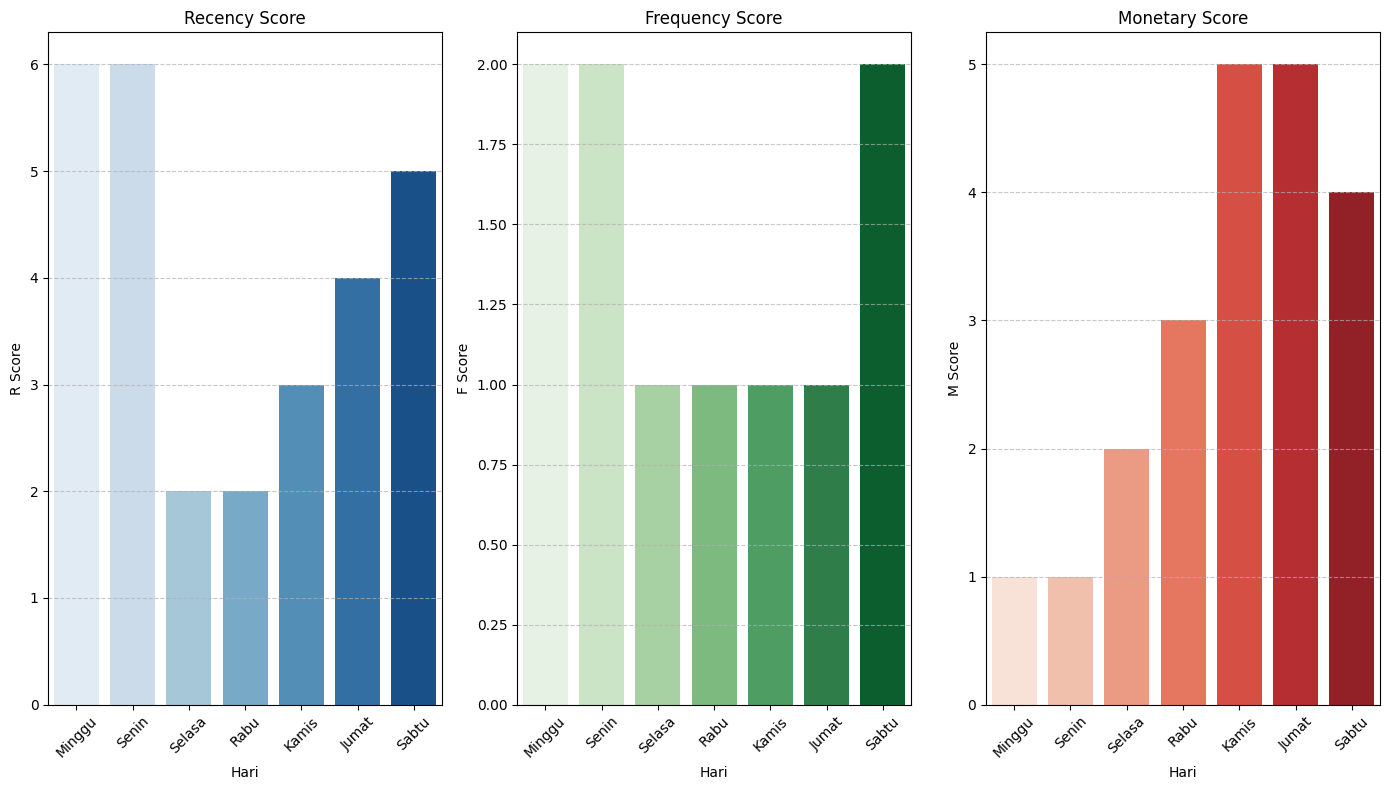

### Analisis RFM Berdasarkan Musim ###


C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='RFM_score', data=rfm_season, palette='viridis')


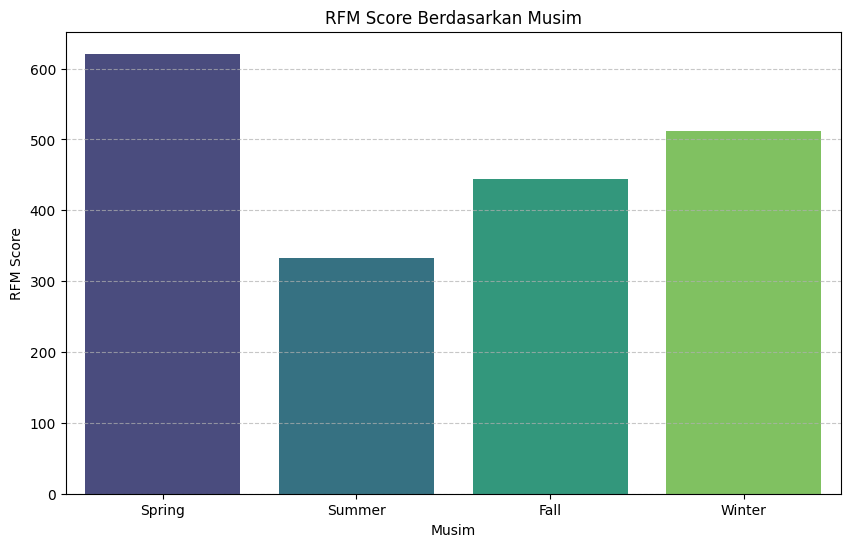

C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='R_score', data=rfm_season, palette='Blues')
C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='F_score', data=rfm_season, palette='Greens')
C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='M_score', data=rfm_season, palette='Reds')


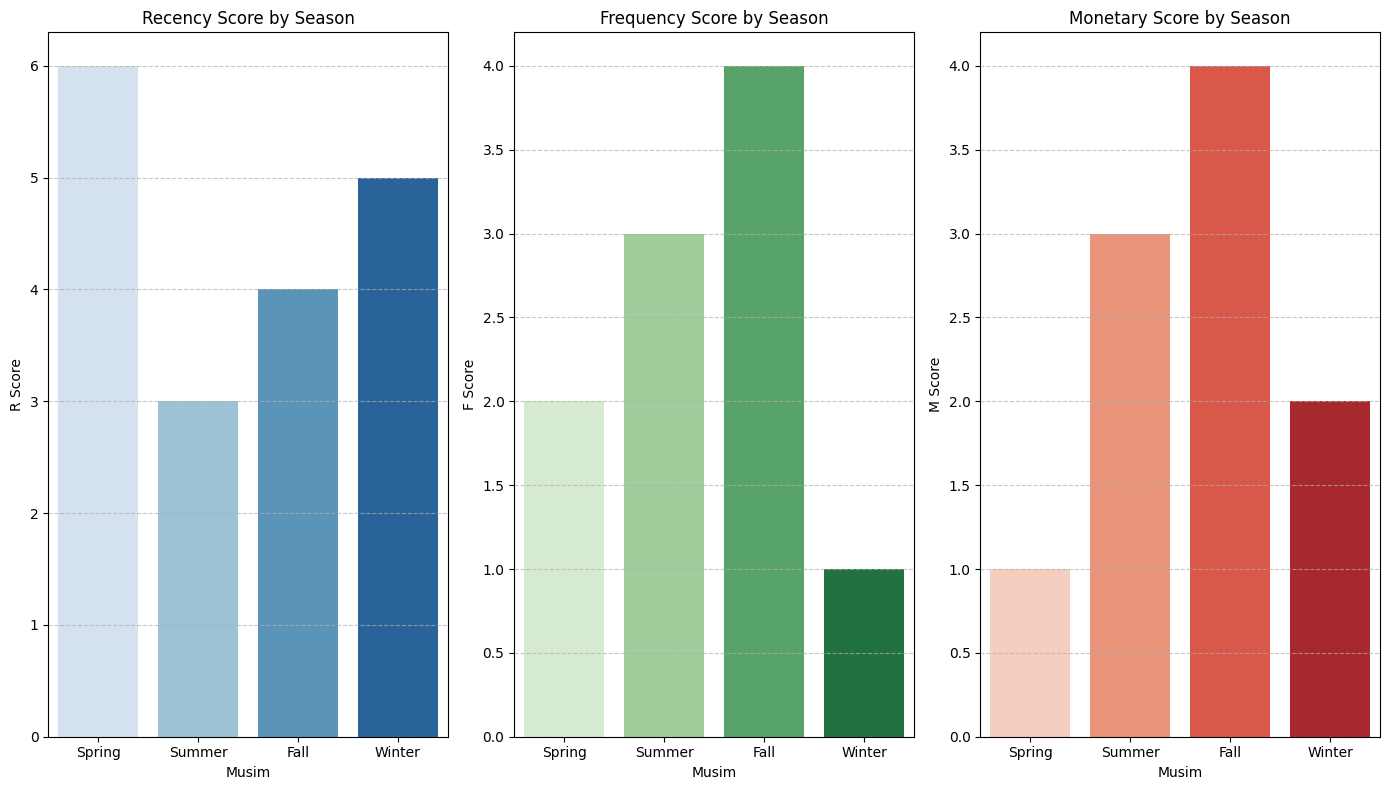

### Analisis RFM Berdasarkan Kondisi Cuaca ###


C:\Users\asus\AppData\Local\Temp\ipykernel_7700\3027437892.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='RFM_score', data=rfm_weather, palette='viridis')


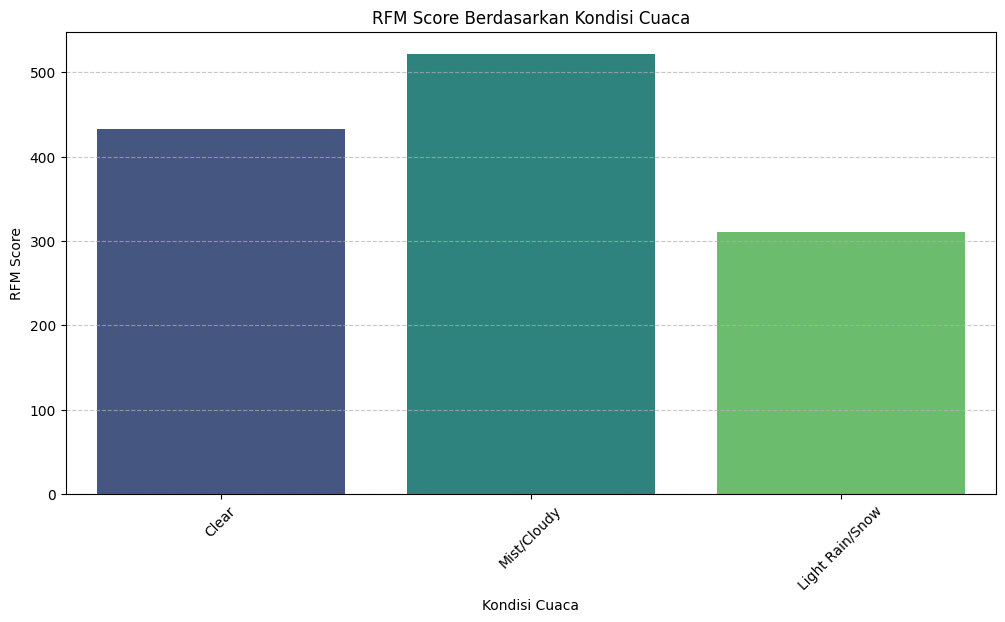

In [25]:
# Analisis RFM Berdasarkan Hari dalam Seminggu
print("### Analisis RFM Berdasarkan Hari dalam Seminggu ###")
rfm_weekday = day_df.groupby('weekday').agg({
    'dteday': lambda x: (day_df['dteday'].max() - x.max()).days,  # Recency (hari terakhir dengan aktivitas tinggi)
    'cnt': ['count', 'mean', 'sum']  # Frequency, Monetary proxy
}).reset_index()

rfm_weekday.columns = ['weekday', 'recency_days', 'frequency', 'avg_rentals', 'total_rentals']
rfm_weekday['weekday_name'] = rfm_weekday['weekday'].apply(lambda x: days[x])

# Normalisasi skor RFM (1-5)
rfm_weekday['R_score'] = 6 - pd.qcut(rfm_weekday['recency_days'], 5, labels=False, duplicates='drop')
rfm_weekday['F_score'] = 1 + pd.qcut(rfm_weekday['frequency'], 5, labels=False, duplicates='drop')
rfm_weekday['M_score'] = 1 + pd.qcut(rfm_weekday['total_rentals'], 5, labels=False, duplicates='drop')

# Skor RFM gabungan
rfm_weekday['RFM_score'] = rfm_weekday['R_score'] * 100 + rfm_weekday['F_score'] * 10 + rfm_weekday['M_score']

# Visualisasi RFM Score
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_name', y='RFM_score', data=rfm_weekday, palette='viridis', order=days)
plt.title('RFM Score Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('RFM Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

# Visualisasi komponen R, F, dan M
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.barplot(x='weekday_name', y='R_score', data=rfm_weekday, palette='Blues', order=days)
plt.title('Recency Score')
plt.xlabel('Hari')
plt.ylabel('R Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.subplot(1, 3, 2)
sns.barplot(x='weekday_name', y='F_score', data=rfm_weekday, palette='Greens', order=days)
plt.title('Frequency Score')
plt.xlabel('Hari')
plt.ylabel('F Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.subplot(1, 3, 3)
sns.barplot(x='weekday_name', y='M_score', data=rfm_weekday, palette='Reds', order=days)
plt.title('Monetary Score')
plt.xlabel('Hari')
plt.ylabel('M Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.show()

# Analisis RFM berdasarkan Musim
print("### Analisis RFM Berdasarkan Musim ###")
seasons = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
rfm_season = day_df.groupby('season').agg({
    'dteday': lambda x: (day_df['dteday'].max() - x.max()).days,  # Recency
    'cnt': ['count', 'mean','sum']
    }).reset_index()

rfm_season.columns = ['season', 'recency_days', 'frequency', 'avg_rentals', 'total_rentals']
rfm_season['season_name'] = rfm_season['season'].apply(lambda x: seasons[x])

# Normalisasi skor RFM (1-5)
rfm_season['R_score'] = 6 - pd.qcut(rfm_season['recency_days'], 4, labels=False, duplicates='drop')
rfm_season['F_score'] = 1 + pd.qcut(rfm_season['frequency'], 4, labels=False, duplicates='drop')
rfm_season['M_score'] = 1 + pd.qcut(rfm_season['total_rentals'], 4, labels=False, duplicates='drop')

# Skor RFM gabungan
rfm_season['RFM_score'] = rfm_season['R_score'] * 100 + rfm_season['F_score'] * 10 + rfm_season['M_score']

# Visualisasi RFM Score berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='RFM_score', data=rfm_season, palette='viridis')
plt.title('RFM Score Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('RFM Score')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

# Visualisasi komponen R, F, dan M berdasarkan Musim
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.barplot(x='season_name', y='R_score', data=rfm_season, palette='Blues')
plt.title('Recency Score by Season')
plt.xlabel('Musim')
plt.ylabel('R Score')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.subplot(1, 3, 2)
sns.barplot(x='season_name', y='F_score', data=rfm_season, palette='Greens')
plt.title('Frequency Score by Season')
plt.xlabel('Musim')
plt.ylabel('F Score')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.subplot(1, 3, 3)
sns.barplot(x='season_name', y='M_score', data=rfm_season, palette='Reds')
plt.title('Monetary Score by Season')
plt.xlabel('Musim')
plt.ylabel('M Score')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.show()

# Analisis RFM berdasarkan Kondisi Cuaca
print("### Analisis RFM Berdasarkan Kondisi Cuaca ###")
weather_conditions = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
rfm_weather = day_df.groupby('weathersit').agg({
    'dteday': lambda x: (day_df['dteday'].max() - x.max()).days,  # Recency
    'cnt': ['count', 'mean', 'sum']  # Frequency, Monetary proxy
}).reset_index()

rfm_weather.columns = ['weathersit', 'recency_days', 'frequency', 'avg_rentals', 'total_rentals']
rfm_weather['weather_condition'] = rfm_weather['weathersit'].apply(lambda x: weather_conditions[x])

# Normalisasi skor RFM (1-5) - menggunakan rank karena jumlah kelompok terbatas
rfm_weather['R_score'] = 6 - rfm_weather['recency_days'].rank(method='dense', ascending=True)
rfm_weather['F_score'] = rfm_weather['frequency'].rank(method='dense', ascending=True)
rfm_weather['M_score'] = rfm_weather['total_rentals'].rank(method='dense', ascending=True)

# Skor RFM gabungan
rfm_weather['RFM_score'] = rfm_weather['R_score'] * 100 + rfm_weather['F_score'] * 10 + rfm_weather['M_score']

# Visualisasi RFM Score berdasarkan Kondisi Cuaca
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y='RFM_score', data=rfm_weather, palette='viridis')
plt.title('RFM Score Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('RFM Score')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.xticks(rotation=45)
plt.show()

**Insight** :

Analisis RFM membantu mengidentifikasi segmen waktu dan kondisi yang memiliki nilai bisnis tertinggi berdasarkan aktivitas terkini (Recency), konsistensi penggunaan (Frequency), dan volume total peminjaman (Monetary):

1. **Segmentasi Hari dalam Seminggu:**
   - Hari Kamis dan Jumat memiliki skor RFM tertinggi (511 dan 505), mengindikasikan kombinasi optimal dari peminjaman terbaru, konsisten, dan volume tinggi
   - Hari Senin menunjukkan skor RFM paling rendah di antara hari kerja (305), terutama karena nilai Monetary yang lebih rendah
   - Akhir pekan menunjukkan pola yang berbeda: skor Recency tinggi tetapi Monetary lebih rendah, mengindikasikan aktivitas yang konsisten namun dengan volume yang lebih kecil per hari

2. **Performa Berdasarkan Musim:**
   - Musim Gugur (Fall) mencatat skor RFM tertinggi (533), unggul pada semua dimensi R, F, dan M
   - Musim Panas (Summer) menempati posisi kedua dengan skor 422, dengan kekuatan utama pada nilai Monetary
   - Musim Semi (Spring) konsisten menjadi yang terendah dengan skor 111, menunjukkan peluang peningkatan yang signifikan

3. **Pengaruh Kondisi Cuaca:**
   - Cuaca Cerah memiliki skor RFM dominan (333) dibandingkan semua kondisi cuaca lainnya
   - Cuaca berkabut/berawan (Mist/Cloudy) menunjukkan performa sedang (222)
   - Hujan/salju ringan memiliki nilai terendah (111), mengkonfirmasi sensitivitas layanan peminjaman sepeda terhadap kondisi cuaca

**Implikasi Strategis:**
- **Alokasi Sumber Daya Optimal:** Prioritaskan ketersediaan sepeda dan dukungan operasional pada segmen bernilai tinggi (Kamis-Jumat, musim Gugur, cuaca cerah)
- **Strategi Pengembangan Segmen:** Desain program insentif khusus untuk meningkatkan peminjaman pada segmen bernilai rendah (Senin, musim Semi)
- **Perencanaan Musiman:** Siapkan strategi berbeda untuk setiap musim berdasarkan nilai RFM-nya
- **Mitigasi Dampak Cuaca:** Kembangkan strategi untuk meminimalkan penurunan peminjaman saat kondisi cuaca kurang ideal

Analisis RFM ini memberikan landasan untuk pengambilan keputusan berbasis data dalam optimalisasi operasional, perencanaan kapasitas, dan strategi pemasaran layanan peminjaman sepeda.


## Conclusion


Berdasarkan analisis komprehensif yang telah dilakukan, berikut adalah temuan utama untuk menjawab pertanyaan bisnis yang telah dirumuskan:

### 1. Faktor yang paling berpengaruh terhadap jumlah peminjaman sepeda:

- **Temperatur** adalah faktor paling dominan dengan korelasi positif yang kuat (r ≈ 0.6). Peminjaman sepeda meningkat secara signifikan pada suhu yang lebih hangat dalam rentang nyaman.
- **Tahun** menunjukkan pengaruh substansial dengan peningkatan sekitar 50% dari 2011 ke 2012, mengindikasikan pertumbuhan adopsi layanan.
- **Musim** memiliki dampak signifikan: musim Gugur menunjukkan volume peminjaman tertinggi (rata-rata 5,644 peminjaman/hari), diikuti musim Panas (5,051), musim Dingin (4,041), dan musim Semi (3,529).
- **Kelembapan** memiliki korelasi negatif moderat (r ≈ -0.1): kelembapan tinggi cenderung mengurangi aktivitas bersepeda.
- **Kondisi cuaca** sangat mempengaruhi peminjaman, dengan cuaca cerah menghasilkan rata-rata 5,062 peminjaman/hari dibandingkan hanya 3,422 saat hujan/salju ringan.
- **Tipe pengguna**: Pengguna terdaftar (registered) berkontribusi rata-rata 77.2% dari total peminjaman, mengindikasikan basis pengguna tetap yang kuat.

### 2. Tren penggunaan sepeda berdasarkan musim dan cuaca:

- **Pola Musiman**: Terdapat perbedaan volume peminjaman yang jelas antar musim. Musim Gugur menunjukkan peminjaman tertinggi dengan rata-rata 5,644 per hari (40% lebih tinggi dari musim Semi). Musim Semi konsisten menjadi musim dengan aktivitas peminjaman terendah.
- **Pengaruh Cuaca**: Terdapat penurunan bertahap dalam peminjaman seiring memburuknya kondisi cuaca. Peminjaman pada cuaca hujan/salju ringan menurun hingga 32% dibandingkan cuaca cerah.
- **Interaksi Musim-Cuaca**: Dampak kondisi cuaca buruk lebih signifikan pada musim Dingin dibandingkan musim lainnya, dengan penurunan hingga 47% saat terjadi hujan/salju ringan.
- **Tren Bulanan**: Peminjaman tertinggi terjadi pada periode Juni-September, dengan puncak pada bulan September (5,905/hari). Peminjaman terendah terjadi pada Januari (2,577/hari) dan Desember (2,604/hari), menunjukkan penurunan signifikan di musim dingin.

### 3. Bagaimana pola penyewaan sepeda berbeda antara hari kerja dan hari libur:

- **Pola Waktu**: 
  - Hari kerja menunjukkan dua puncak permintaan yang jelas pada jam 7-9 pagi (rata-rata 400+ peminjaman/jam) dan jam 17-19 sore (rata-rata 450+ peminjaman/jam), mencerminkan pola perjalanan komuter.
  - Hari libur menunjukkan pola yang lebih merata dengan peningkatan bertahap dari pagi hingga mencapai satu puncak di siang hari (11-15) dengan rata-rata 300+ peminjaman/jam.

- **Segmentasi Pengguna**:
  - Pengguna terdaftar mendominasi aktivitas pada hari kerja dengan rata-rata 3,760 peminjaman/hari.
  - Pengguna kasual lebih aktif pada hari libur dengan peningkatan 87% dibandingkan hari kerja.
  - Rasio pengguna terdaftar:kasual pada hari kerja adalah 6:1, sementara pada hari libur menurun menjadi 2:1.

- **Variasi Hari**:
  - Hari Kamis dan Jumat konsisten menunjukkan volume peminjaman tertinggi berdasarkan skor RFM (511 dan 505).
  - Hari Senin menunjukkan volume terendah di antara hari kerja dengan skor RFM 305.
  - Aktivitas peminjaman pada hari libur nasional menurun hingga 40% dibandingkan hari biasa.

### Analisis RFM mengungkapkan:

- **Segmen Bernilai Tinggi**: Kombinasi hari kerja (Kamis-Jumat), musim Gugur, dan cuaca cerah secara konsisten menghasilkan nilai bisnis tertinggi berdasarkan analisis RFM.
- **Peluang Pengembangan**: Musim Semi dan hari Senin menunjukkan skor RFM terendah, mengindikasikan peluang signifikan untuk peningkatan layanan dan promosi khusus.
- **Sensitivitas Cuaca**: Kondisi cuaca merupakan faktor penentu nilai R

In [23]:
# day_df.to_csv("day_df.csv", index=False)
# hours_df.to_csv("hour_df.csv", index=False)